
# Exploratory Data Analysis and Visualization of Addidas sales data

# Introduction

The aim of this project is to analyze a retail sales dataset and derive actionable insights to enhance sales performance, optimize product offerings, improve pricing strategies, evaluate sales channels, and identify market segments. By leveraging the dataset's rich information on retailer performance, product details, pricing, and sales methods, we seek to gain a comprehensive understanding of the retail landscape and drive data-informed decision-making.

The project's objectives encompass five key areas:

- Sales Performance Evaluation: We will assess the overall sales performance across different retailers, regions, states, and cities. By identifying top-performing areas and analyzing sales trends, we can uncover factors contributing to success and devise strategies to replicate and enhance sales performance.

- Product Analysis and Optimization: Through detailed product analysis, we aim to identify the most popular products, assess their profitability, and optimize inventory and pricing strategies. This analysis will enable us to refine product offerings, align with customer preferences, and maximize revenue potential.

- Pricing and Profitability Insights: By examining pricing structures, total sales, operating profit, and operating margin, we will gain insights into pricing strategies and profitability. This analysis will enable us to optimize pricing models, identify lucrative product categories, and enhance profit margins.

- Sales Channel Evaluation: The project will involve an in-depth evaluation of various sales methods and channels utilized in the dataset. By assessing the effectiveness of different sales channels, such as in-store and online, we can identify opportunities for channel optimization, expansion, and omni-channel strategies.

- Market Segmentation: Leveraging the geographical information available in the dataset, we will explore regional and market segmentation. This analysis will provide valuable insights into sales performance across different regions, states, and cities. By identifying distinct market segments, we can tailor marketing efforts, optimize product offerings, and deliver targeted strategies for increased customer engagement and sales growth.

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing dataset
from google.colab import files
upload = files.upload()

Saving Adidas US Sales Datasets.xlsx to Adidas US Sales Datasets.xlsx


In [ ]:
import pandas as pd
df = pd.read_excel('Adidas US Sales Datasets.xlsx')
df.head(100)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,Walmart,1197831,2020-08-11 00:00:00,South,Texas,Houston,Women's Apparel,40,800,320000,160000,0.5,Outlet
96,NaN,Walmart,1197831,2020-08-12 00:00:00,South,Texas,Houston,Men's Street Footwear,30,925,277500,97125,0.35,Outlet
97,NaN,Walmart,1197831,2020-08-13 00:00:00,South,Texas,Houston,Men's Athletic Footwear,40,925,370000,129500.0,0.35,Outlet
98,NaN,Walmart,1197831,2020-08-14 00:00:00,South,Texas,Houston,Women's Street Footwear,35,775,271250,94937.5,0.35,Outlet


# Data cleaning and preprocessing

In [ ]:
# Dropping the unnamed: 0 column
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [ ]:
# Delete the first three rows
df = df.drop(df.index[0:3])

# Reset the index
df = df.reset_index(drop=True)
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
1,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
2,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
3,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
4,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store


In [ ]:
# Setting the values of the first row as column headers
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

In [ ]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [ ]:
# Looking for null values
df.isnull().any()

0
Retailer            False
Retailer ID         False
Invoice Date        False
Region              False
State               False
City                False
Product             False
Price per Unit      False
Units Sold          False
Total Sales         False
Operating Profit    False
Operating Margin    False
Sales Method        False
dtype: bool

In [ ]:
#Looking for duplicates
df.duplicated().any()

False

In [ ]:
df.describe()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9648,9648,9648,9648,9648,9648,9648,9648.0,9648,9648.0,9648.0,9648.00,9648
unique,6,4,724,5,50,52,6,146.0,361,3512.0,6510.0,127.00,3
top,Foot Locker,1185732,2021-01-17 00:00:00,West,California,Portland,Men's Street Footwear,50.0,225,100000.0,21000.0,0.35,Online
freq,2637,5265,77,2448,432,360,1610,557.0,207,52.0,34.0,1229.00,4889


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


We can see that the invoice date is not in a date format. Let's fix it.

In [ ]:
# Convert the column to datetime format
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   object        
 8   Units Sold        9648 non-null   object        
 9   Total Sales       9648 non-null   object        
 10  Operating Profit  9648 non-null   object        
 11  Operating Margin  9648 non-null   object        
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), object(12)
memory usage: 980.0+ KB


In [ ]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


# 1. Sales performance evaluation

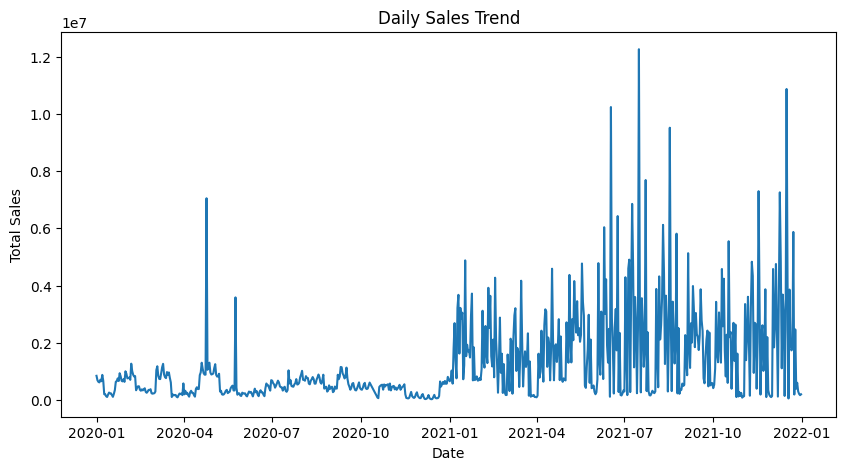

In [ ]:
# Grouping data by date and calculate the total sales for each date
daily_sales = df.groupby('Invoice Date')['Total Sales'].sum()

# line plot
plt.figure(figsize=(10,5))
plt.plot(daily_sales.index, daily_sales.values)

plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Trend')

plt.show()

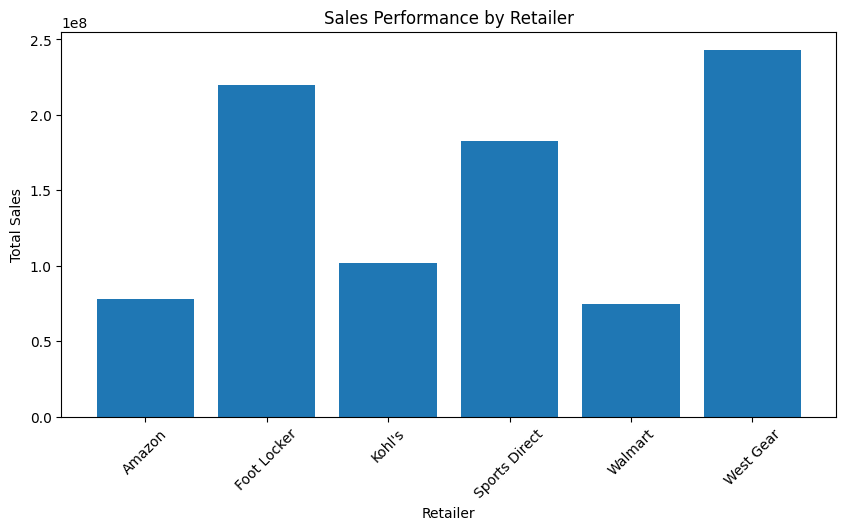

In [ ]:
# Group the data by the retailers
grouped_data = df.groupby('Retailer')['Total Sales'].sum()

# Bar plot
plt.figure(figsize=(10,5))
plt.bar(grouped_data.index, grouped_data.values)

plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.title('Sales Performance by Retailer')

# Rotating the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.show()

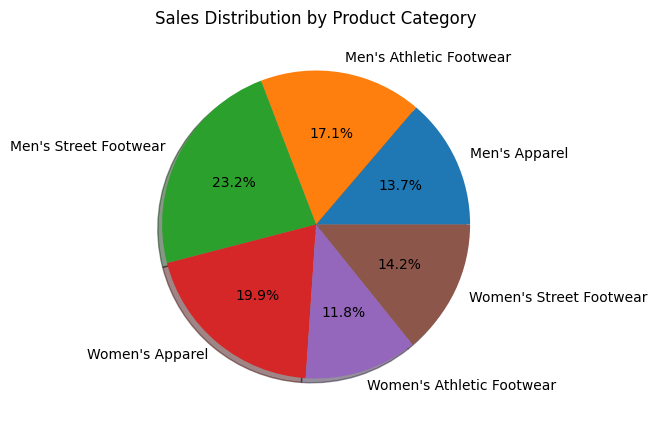

In [ ]:
# Grouping the data by product category and calculate the total sales for each category
category_sales = df.groupby('Product')['Total Sales'].sum()

# Pie chart
plt.figure(figsize=(10,5))
plt.pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%', shadow=True)

plt.title('Sales Distribution by Product Category')

plt.show()

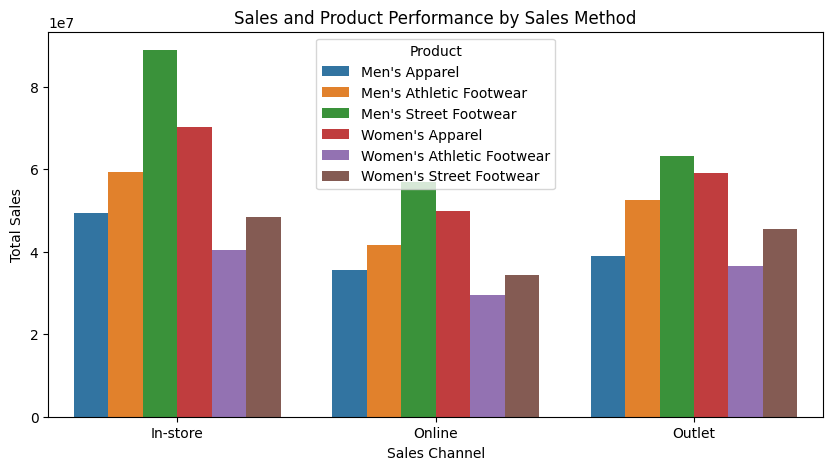

In [ ]:
# Grouping the data by sales methods
grouped_data = df.groupby(['Sales Method', 'Product'])['Total Sales'].sum().reset_index()

# Stacked bar plot
plt.figure(figsize=(10,5))
sns.barplot(data=grouped_data, x='Sales Method', y='Total Sales', hue='Product')

plt.xlabel('Sales Channel')
plt.ylabel('Total Sales')
plt.title('Sales and Product Performance by Sales Method')

plt.show()

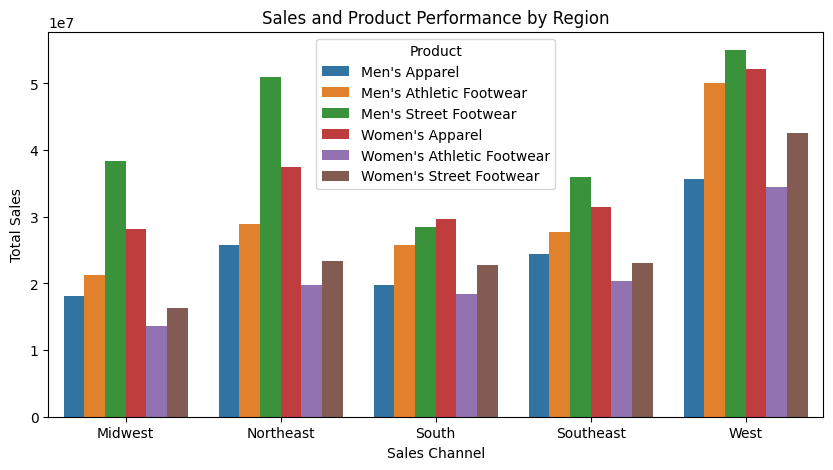

In [ ]:
# Grouping the data by region
grouped_data = df.groupby(['Region', 'Product'])['Total Sales'].sum().reset_index()

# Stacked bar plot
plt.figure(figsize=(10,5))
sns.barplot(data=grouped_data, x='Region', y='Total Sales', hue='Product')

plt.xlabel('Sales Channel')
plt.ylabel('Total Sales')
plt.title('Sales and Product Performance by Region')

plt.show()

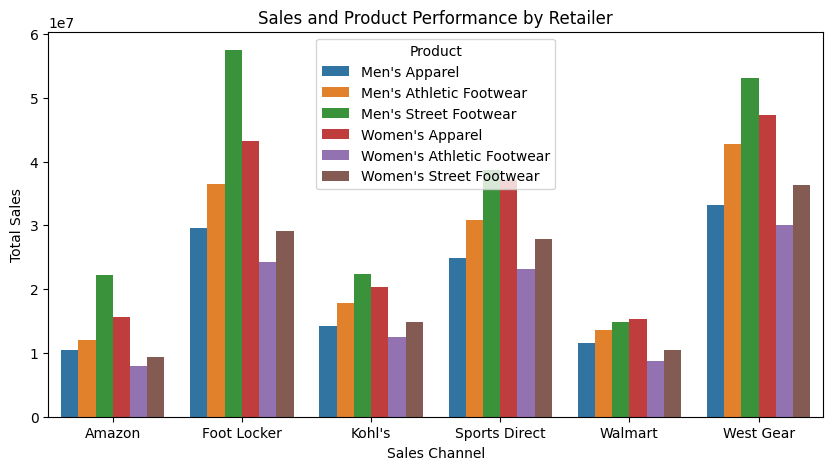

In [ ]:
# Grouping the data by retailers
grouped_data = df.groupby(['Retailer', 'Product'])['Total Sales'].sum().reset_index()

# Stacked bar plot
plt.figure(figsize=(10,5))
sns.barplot(data=grouped_data, x='Retailer', y='Total Sales', hue='Product')

plt.xlabel('Sales Channel')
plt.ylabel('Total Sales')
plt.title('Sales and Product Performance by Retailer')

plt.show()

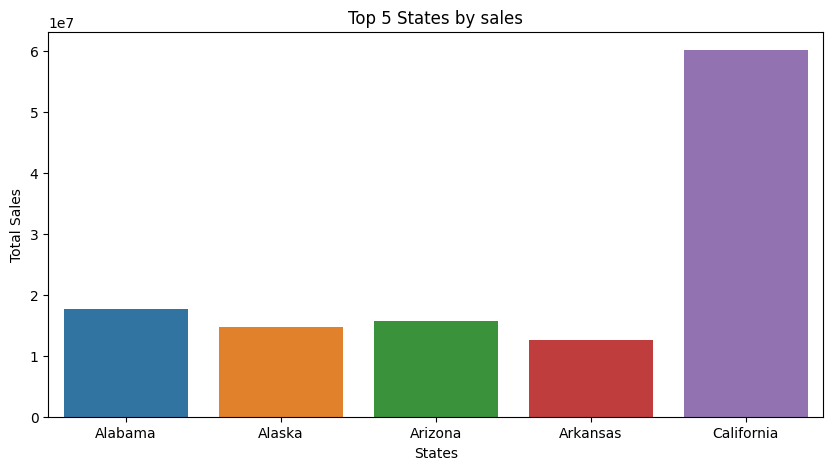

In [ ]:

# Grouping data
grouped_data = df.groupby('State')['Total Sales'].sum().reset_index().head(5)

# Barplot
plt.figure(figsize=(10,5))
sns.barplot(data = grouped_data, x='State', y='Total Sales')

plt.xlabel('States')
plt.ylabel('Total Sales')
plt.title('Top 5 States by sales')

plt.show()

# Product Analysis

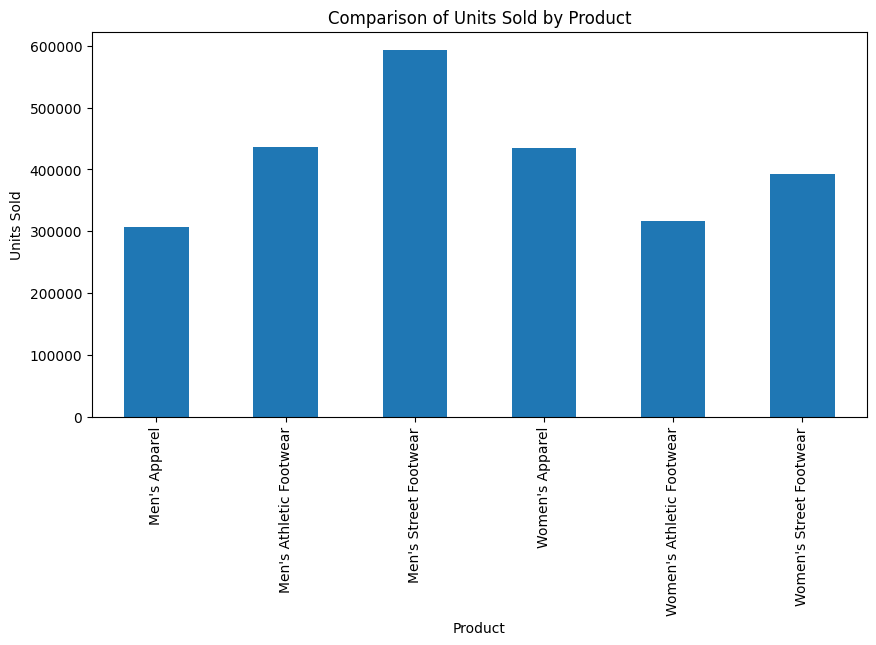

In [ ]:

# Extracting the product data
product_data = df.groupby('Product')['Units Sold'].sum()

# Bar plot
plt.figure(figsize=(10,5))
product_data.plot(kind='bar')

plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.title('Comparison of Units Sold by Product')

plt.show()

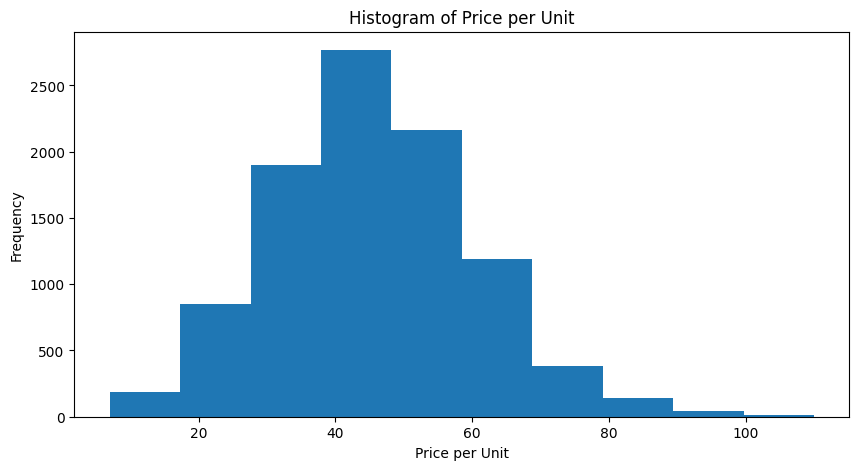

In [ ]:
# Extracting the price per unit data
price_per_unit_data = df['Price per Unit']

# Hiistogram
plt.figure(figsize=(10,5))
plt.hist(price_per_unit_data, bins=10)

plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.title('Histogram of Price per Unit')

plt.show()

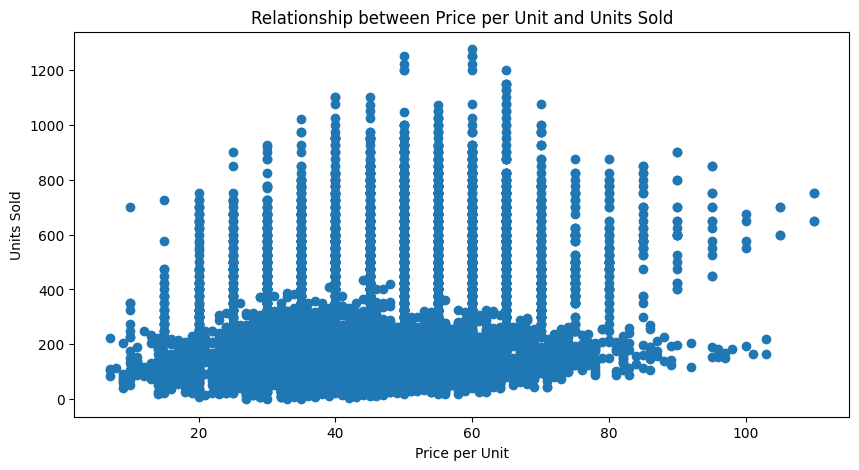

In [ ]:
# Extracting the price per unit and units sold data
price_per_unit_data = df['Price per Unit']
units_sold_data = df['Units Sold']

# Scatter plot
plt.figure(figsize=(10,5))
plt.scatter(price_per_unit_data, units_sold_data)

# Customize the plot
plt.xlabel('Price per Unit')
plt.ylabel('Units Sold')
plt.title('Relationship between Price per Unit and Units Sold')

# Display the plot
plt.show()

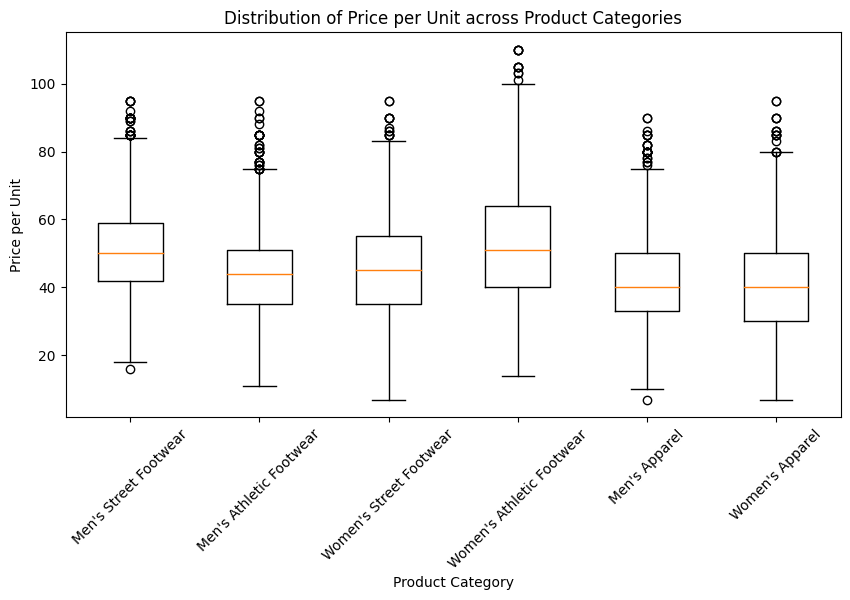

In [ ]:
# Extracting the price per unit data grouped by product category
price_per_unit_data = df.groupby('Product')['Price per Unit'].apply(list)

# box plot
plt.figure(figsize=(10,5))
plt.boxplot(price_per_unit_data)

plt.xlabel('Product Category')
plt.ylabel('Price per Unit')
plt.title('Distribution of Price per Unit across Product Categories')
plt.xticks(rotation=45)

product_categories = df['Product'].unique()
plt.xticks(range(1, len(product_categories) + 1), product_categories)

plt.show()

# Profitability analysis

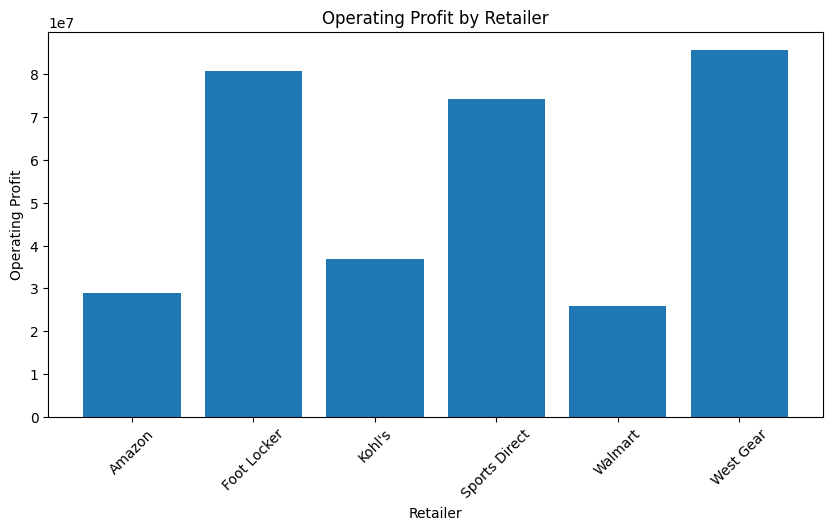

In [ ]:
# Grouping the data by retailer and calculate the total operating profit
operating_profit_by_retailer = df.groupby('Retailer')['Operating Profit'].sum()

# bar plot
plt.figure(figsize=(10,5))
plt.bar(operating_profit_by_retailer.index, operating_profit_by_retailer)

plt.xlabel('Retailer')
plt.ylabel('Operating Profit')
plt.title('Operating Profit by Retailer')
plt.xticks(rotation=45)

plt.show()

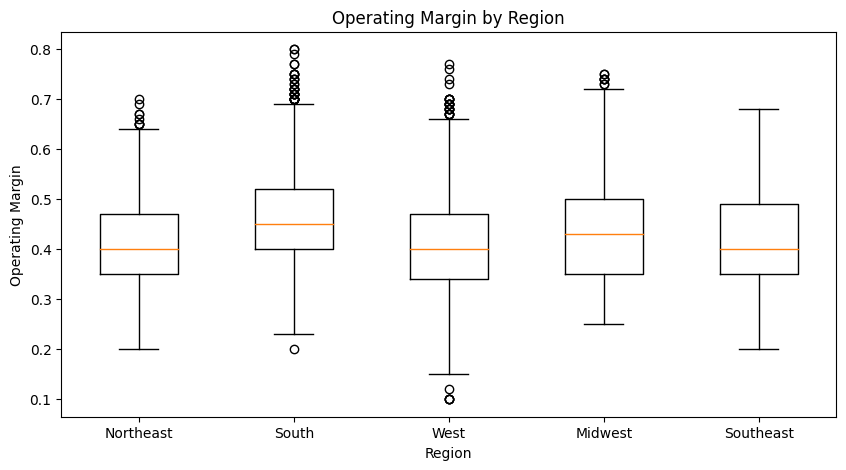

In [ ]:

# Creating a dictionary to store operating margin data by region
operating_margin_by_region = {}

# Iterating over each unique region
for region in df['Region'].unique():

    # Filtering the data for the current region
    region_data = df[df['Region'] == region]

    # Adding the operating margins for the region to the dictionary
    operating_margin_by_region[region] = region_data['Operating Margin'].tolist()

# list of operating margin values for each region
operating_margin_values = list(operating_margin_by_region.values())

# list of region labels
region_labels = list(operating_margin_by_region.keys())

# box plot
plt.figure(figsize=(10,5))
plt.boxplot(operating_margin_values, labels=region_labels)

plt.xlabel('Region')
plt.ylabel('Operating Margin')
plt.title('Operating Margin by Region')

plt.show()

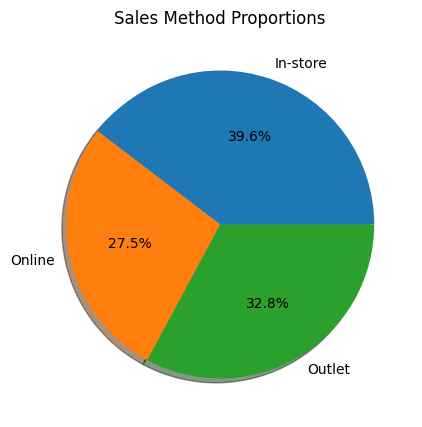

In [ ]:

# total sales for each sales method
sales_by_method = df.groupby('Sales Method')['Total Sales'].sum()

# pie chart
plt.figure(figsize=(10,5))
plt.pie(sales_by_method, labels=sales_by_method.index, autopct='%1.1f%%', shadow=True)
plt.title('Sales Method Proportions')

plt.show()

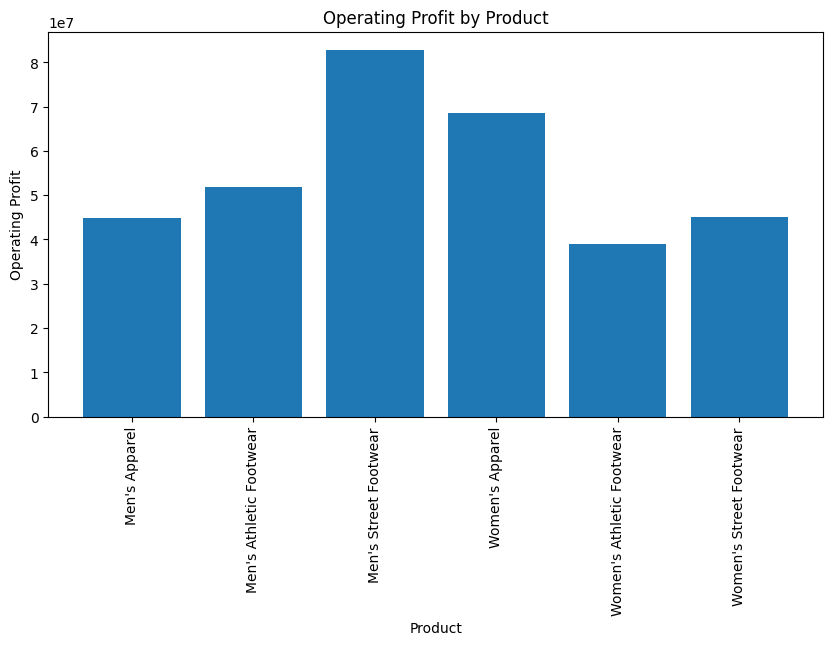

In [ ]:
# Grouping the data by product and calculate the total operating profit
operating_profit_by_product = df.groupby('Product')['Operating Profit'].sum()

# Bar plot
plt.figure(figsize=(10,5))
plt.bar(operating_profit_by_product.index, operating_profit_by_product)

plt.xlabel('Product')
plt.ylabel('Operating Profit')
plt.title('Operating Profit by Product')

plt.xticks(rotation=90)

plt.show()

# Market segmentation

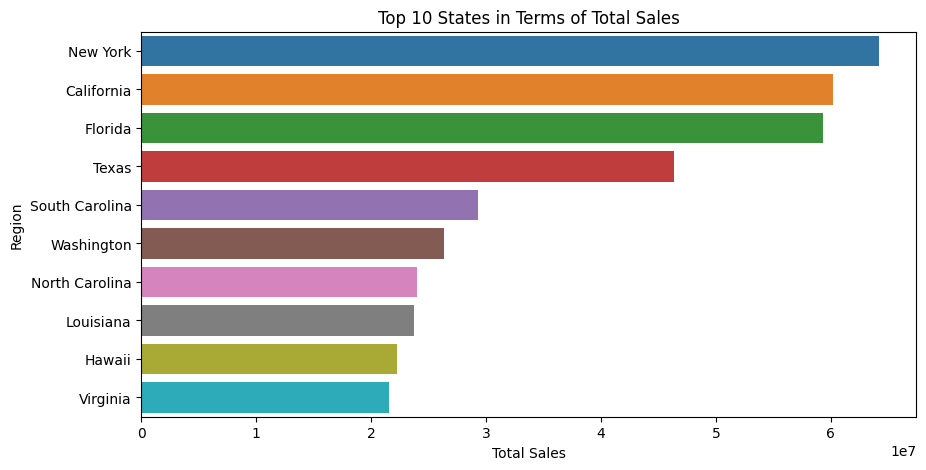

In [ ]:

# Grouping data
total_sales_by_region = df.groupby('State')['Total Sales'].sum().reset_index()

top_ten_regions = total_sales_by_region.nlargest(10, 'Total Sales')

plt.figure(figsize=(10, 5))
sns.barplot(x='Total Sales', y='State', data=top_ten_regions, orient='h')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.title('Top 10 States in Terms of Total Sales')
plt.show()

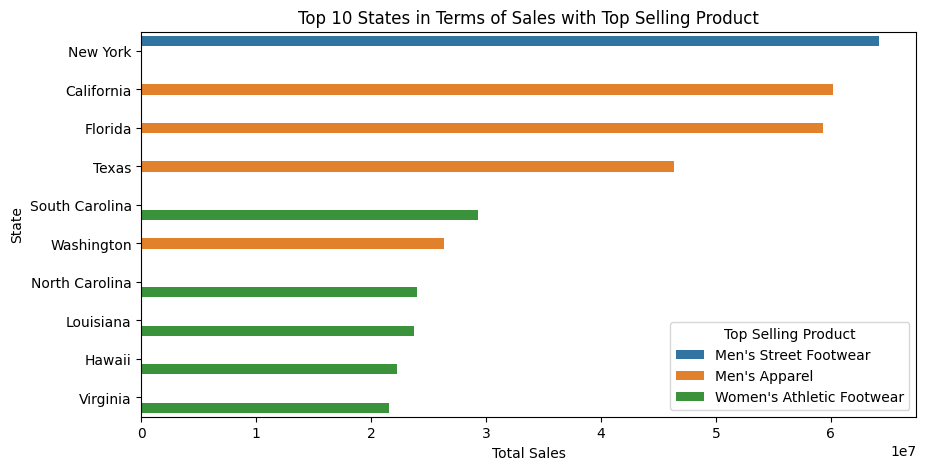

In [ ]:
# Grouping data
total_sales_by_state = df.groupby('State')['Total Sales'].sum().reset_index()
top_10_states = total_sales_by_state.nlargest(10, 'Total Sales')

# Top selling product for each state
top_selling_product_by_state = df.loc[df['State'].isin(top_10_states['State'])].groupby('State')['Product'].agg(lambda x: x.value_counts().index[0]).reset_index()
top_10_states_with_product = pd.merge(top_10_states, top_selling_product_by_state, on='State')

# Bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Total Sales', y='State', hue='Product', data=top_10_states_with_product)
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.title('Top 10 States in Terms of Sales with Top Selling Product')
plt.legend(title='Top Selling Product')
plt.show()

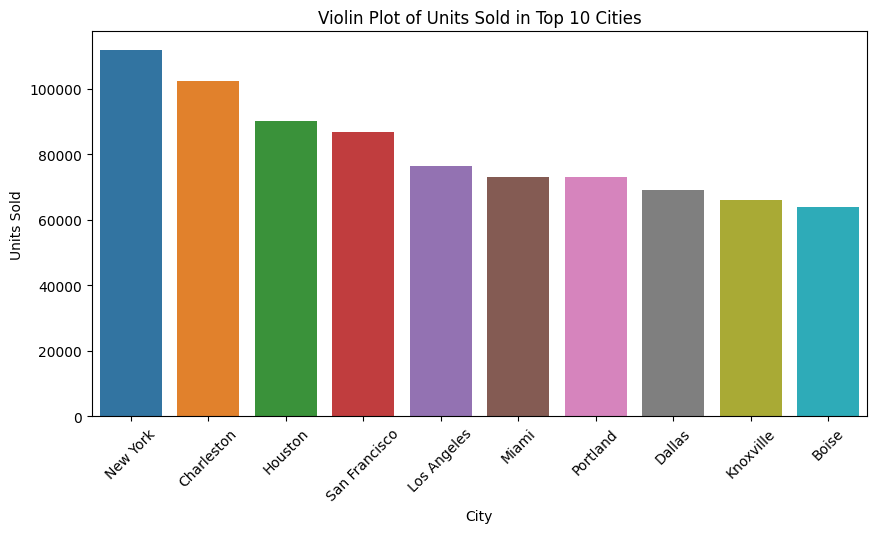

In [ ]:
# Grouping data
total_units_sold_by_city = df.groupby('City')['Units Sold'].sum().reset_index()

# Top 10 cities
total_units_sold_by_city['Units Sold'] = total_units_sold_by_city['Units Sold'].astype(int)
top_10_cities = total_units_sold_by_city.nlargest(10, 'Units Sold')

plt.figure(figsize=(10, 5))
sns.barplot(x='City', y='Units Sold', data=top_10_cities)
plt.xlabel('City')
plt.ylabel('Units Sold')
plt.title('Violin Plot of Units Sold in Top 10 Cities')
plt.xticks(rotation=45)
plt.show()

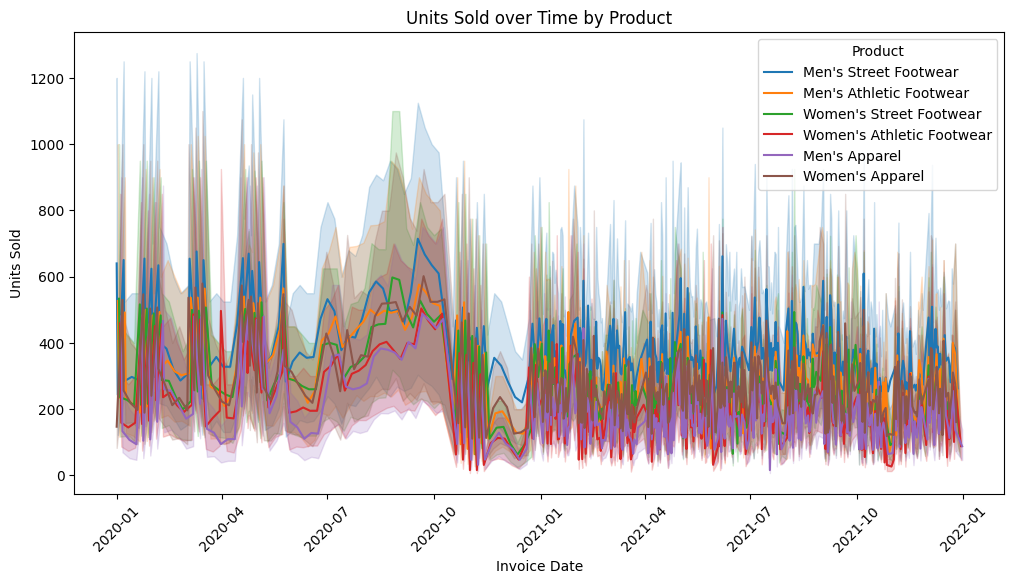

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Invoice Date', y='Units Sold', hue='Product', data=df)
plt.xlabel('Invoice Date')
plt.ylabel('Units Sold')
plt.title('Units Sold over Time by Product')
plt.xticks(rotation=45)
plt.show()

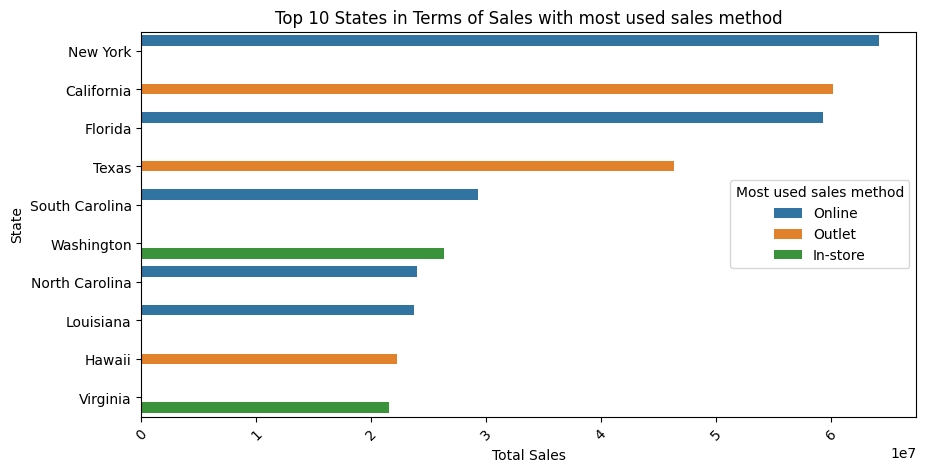

In [ ]:
# Grouping data
total_sales_by_state = df.groupby('State')['Total Sales'].sum().reset_index()
total_sales_by_state['Total Sales'] = total_sales_by_state['Total Sales'].astype(int)
top_10_states = total_sales_by_state.nlargest(10, 'Total Sales')

# Top selling product for each state
top_selling_product_by_state = df.loc[df['State'].isin(top_10_states['State'])].groupby('State')['Sales Method'].agg(lambda x: x.value_counts().index[0]).reset_index()
top_10_states_with_Method = pd.merge(top_10_states, top_selling_product_by_state, on='State')

# Bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Total Sales', y='State', hue='Sales Method', data=top_10_states_with_Method)
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.title('Top 10 States in Terms of Sales with most used sales method')
plt.legend(title='Most used sales method')
plt.xticks(rotation=45)
plt.show()

# Conclusion

This project involved visualizing sales data using line plots, bar plots, and violin plots. The goal was to gain insights into the units sold in different cities, the top city for each product, and the trend of units sold over time.

Overall, the visualizations created in this project using Seaborn and Matplotlib allowed for a comprehensive exploration of the sales data, enabling the identification of sales patterns, top-performing cities, and the performance of individual products. These visualizations can assist stakeholders in making data-driven decisions and developing effective sales strategies.